In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

ids = "SRR633516 SRR633540 SRR633541 SRR633542 SRR633543 SRR633549 SRR633548 SRR633547 SRR633546 SRR633544 SRR633545".split(" ")
# read Transcript-level and Gene-level differential expression results as csv
transcript_expn = pd.read_csv("/mnt/c/Users/david/Desktop/zebrafish/files/cuffdiff/isoform_exp.diff", sep = "\t").rename(columns={"value_1": "FPKM_1", "value_2": "FPKM_2"})
gene_expn =  pd.read_csv("/mnt/c/Users/david/Desktop/zebrafish/files/cuffdiff/gene_exp.diff", sep = "\t").rename(columns={"value_1": "FPKM_1", "value_2": "FPKM_2"})

sample names are named as q1 q2 ... q11 first let's change real them to experiment run names

In [2]:
qvals = ["q" + str(curr) for curr in list(range(1,12))]
labels_fixed = dict(zip(qvals,ids))
transcript_expn = transcript_expn.replace(to_replace=labels_fixed)
gene_expn = gene_expn.replace(to_replace=labels_fixed)

now let's add run treatment label for each run. ck is control treatment and cold is cold treatment.

In [3]:
treatments = ["ck","ck","ck","ck","ck","cold","cold","cold","cold","cold","cold"]

treatments_fixed = dict(zip(ids,treatments))
transcript_expn["treatment_1"] = transcript_expn["sample_1"].replace(to_replace=treatments_fixed)
transcript_expn["treatment_2"] = transcript_expn["sample_2"].replace(to_replace=treatments_fixed)
gene_expn["treatment_1"] = gene_expn["sample_1"].replace(to_replace=treatments_fixed)
gene_expn["treatment_2"] = gene_expn["sample_2"].replace(to_replace=treatments_fixed)

now we will have data for each gene expression on different treatments((ck,ck), (ck,cold), (cold,cold))
but we only need ck - > cold expression data for each gene to study how expression changed with cold temperature so let's take just that data

In [4]:
transcript_expn = transcript_expn[(transcript_expn["treatment_1"] == "ck") & (transcript_expn["treatment_2"] == "cold")]
gene_expn = gene_expn[(gene_expn["treatment_1"] == "ck") & (gene_expn["treatment_2"] == "cold")]

In [5]:
transcript_expn

,test_id,gene_id,gene,locus,sample_1,sample_2,status,FPKM_1,FPKM_2,log2(fold_change),test_stat,p_value,q_value,significant,treatment_1,treatment_2
734450,ENSDART00000000004,MSTRG.26537,slc35a5,9:34089155-34121850,SRR633516,SRR633549,OK,1.847100,1.128210,-0.711219,-0.747588,0.44705,0.994438,no,ck,cold
734451,ENSDART00000000005,MSTRG.26536,ccdc80,9:34089155-34121850,SRR633516,SRR633549,OK,5.142210,6.533080,0.345376,0.760074,0.43820,0.994438,no,ck,cold
734452,ENSDART00000000042,ENSDARG00000033231,mcm6l,2:50199737-50225495,SRR633516,SRR633549,NOTEST,0.125836,0.042125,-1.578800,0.000000,1.00000,1.000000,no,ck,cold
734453,ENSDART00000000069,MSTRG.4064,slc9a3r1a,12:33484457-33537126,SRR633516,SRR633549,OK,23.310700,20.469600,-0.187508,-0.503952,0.60490,0.994438,no,ck,cold
734454,ENSDART00000000070,MSTRG.17115,dap,24:22070289-22103585,SRR633516,SRR633549,OK,21.224300,19.398600,-0.129765,-0.279437,0.77280,0.994438,no,ck,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672245,MSTRG.9989.2,MSTRG.9989,-,18:22138923-22283817,SRR633543,SRR633545,OK,1.664300,0.625953,-1.410790,-0.999456,0.29435,0.920589,no,ck,cold
3672246,MSTRG.999.1,MSTRG.999,-,1:53556063-53557452,SRR633543,SRR633545,OK,4.389300,1.323010,-1.730160,-1.583840,0.14500,0.872257,no,ck,cold
3672247,MSTRG.9991.2,MSTRG.9991,-,18:22302634-22396371,SRR633543,SRR633545,OK,7.674530,7.413440,-0.049934,-0.081830,0.93485,0.994438,no,ck,cold
3672248,MSTRG.9991.3,MSTRG.9991,-,18:22302634-22396371,SRR633543,SRR633545,OK,9.044260,14.090900,0.639687,1.248600,0.20045,0.890882,no,ck,cold


In [6]:
gene_expn

,test_id,gene_id,gene,locus,sample_1,sample_2,status,FPKM_1,FPKM_2,log2(fold_change),test_stat,p_value,q_value,significant,treatment_1,treatment_2
359750,ENSDARG00000000460,ENSDARG00000000460,nitr2b,7:17400444-17458631,SRR633516,SRR633549,NOTEST,0.094774,0.000000,-inf,0.000000,1.00000,1.000000,no,ck,cold
359751,ENSDARG00000000474,ENSDARG00000000474,tnni1a,23:5723089-5729484,SRR633516,SRR633549,NOTEST,1.089690,0.450133,-1.275500,0.000000,1.00000,1.000000,no,ck,cold
359752,ENSDARG00000000516,ENSDARG00000000516,ankar,9:41045873-41077934,SRR633516,SRR633549,NOTEST,0.076191,0.150403,0.981145,0.000000,1.00000,1.000000,no,ck,cold
359753,ENSDARG00000000638,ENSDARG00000000638,opn1mw4,6:41200499-41202554,SRR633516,SRR633549,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no,ck,cold
359754,ENSDARG00000000656,ENSDARG00000000656,psmb9a,19:7105837-7144585,SRR633516,SRR633549,NOTEST,0.000000,0.294481,inf,0.000000,1.00000,1.000000,no,ck,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798745,MSTRG.9995,MSTRG.9995,bcar1,18:22504199-22688073,SRR633543,SRR633545,OK,7.853430,8.679850,0.144347,0.385963,0.69145,0.997942,no,ck,cold
1798746,MSTRG.9996,MSTRG.9996,CR933017.1,18:22504199-22688073,SRR633543,SRR633545,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no,ck,cold
1798747,MSTRG.9997,MSTRG.9997,nudt21,18:22721550-22735004,SRR633543,SRR633545,OK,16.420800,32.091800,0.966678,2.477050,0.01670,0.599196,no,ck,cold
1798748,MSTRG.9998,MSTRG.9998,"BX088710.1,hsf4",18:22739731-22753672,SRR633543,SRR633545,OK,6.080760,4.833350,-0.331227,-0.667862,0.48355,0.997942,no,ck,cold


let's group this data by genes and experiments. let's average FPKMs so that we can better determine expression level change between ck and cold treatments.

In [7]:
transcript_expn = transcript_expn.groupby(["gene_id"], as_index=False).mean()[["gene_id", "FPKM_1", "FPKM_2"]]
gene_expn = gene_expn.groupby(["gene_id"], as_index=False).mean()[["gene_id", "FPKM_1", "FPKM_2"]]

In [8]:
transcript_expn

,gene_id,FPKM_1,FPKM_2
0,ENSDARG00000000460,0.079871,0.000000
1,ENSDARG00000000474,0.727953,0.165031
2,ENSDARG00000000516,0.057098,0.051600
3,ENSDARG00000000638,0.000000,0.000000
4,ENSDARG00000000656,0.070342,0.217174
...,...,...,...
35970,MSTRG.9995,1.345781,1.520828
35971,MSTRG.9996,0.000000,0.000000
35972,MSTRG.9997,17.917200,28.818917
35973,MSTRG.9998,1.533409,1.578969


In [9]:
gene_expn

,gene_id,FPKM_1,FPKM_2
0,ENSDARG00000000460,0.079871,0.000000
1,ENSDARG00000000474,0.727953,0.165031
2,ENSDARG00000000516,0.114197,0.103199
3,ENSDARG00000000638,0.000000,0.000000
4,ENSDARG00000000656,0.070342,0.217174
...,...,...,...
35970,MSTRG.9995,8.074686,9.124967
35971,MSTRG.9996,0.000000,0.000000
35972,MSTRG.9997,17.917200,28.818917
35973,MSTRG.9998,4.600228,4.736907


now let's recalculate log2(fold_change) to get better grasp of how expressions changed between treatments

In [10]:
transcript_expn["log2(fold_change)"] = np.log2(transcript_expn["FPKM_2"] / transcript_expn["FPKM_1"])
transcript_expn

/home/david/miniconda3/envs/zebrafish/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gene_id,FPKM_1,FPKM_2,log2(fold_change)
0,ENSDARG00000000460,0.079871,0.000000,-inf
1,ENSDARG00000000474,0.727953,0.165031,-2.141107
2,ENSDARG00000000516,0.057098,0.051600,-0.146091
3,ENSDARG00000000638,0.000000,0.000000,NaN
4,ENSDARG00000000656,0.070342,0.217174,1.626401
...,...,...,...,...
35970,MSTRG.9995,1.345781,1.520828,0.176413
35971,MSTRG.9996,0.000000,0.000000,NaN
35972,MSTRG.9997,17.917200,28.818917,0.685671
35973,MSTRG.9998,1.533409,1.578969,0.042240


In [11]:
gene_expn["log2(fold_change)"] = np.log2(gene_expn["FPKM_2"] / gene_expn["FPKM_1"])
gene_expn

/home/david/miniconda3/envs/zebrafish/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gene_id,FPKM_1,FPKM_2,log2(fold_change)
0,ENSDARG00000000460,0.079871,0.000000,-inf
1,ENSDARG00000000474,0.727953,0.165031,-2.141107
2,ENSDARG00000000516,0.114197,0.103199,-0.146091
3,ENSDARG00000000638,0.000000,0.000000,NaN
4,ENSDARG00000000656,0.070342,0.217174,1.626401
...,...,...,...,...
35970,MSTRG.9995,8.074686,9.124967,0.176413
35971,MSTRG.9996,0.000000,0.000000,NaN
35972,MSTRG.9997,17.917200,28.818917,0.685671
35973,MSTRG.9998,4.600228,4.736907,0.042240


-inf in log2(fold_change) column means that gene was expressed during ck treatment and wasn't expressed during cold treatment.
inf in log2(fold_change) column meanst that gene wasn't expressed during ck treatment and was expressed during cold treatment.
NaN in log2(fold_change) column that gene wasn't expressed during any of the treatments.

so let's separate these kind of rows from others.

In [12]:
transcript_expn_infs = transcript_expn[(transcript_expn["log2(fold_change)"] == np.inf) | (transcript_expn["log2(fold_change)"] == -np.inf)]
transcript_expn_nans = transcript_expn[transcript_expn["log2(fold_change)"].isna()]
transcript_expn = transcript_expn[(transcript_expn["log2(fold_change)"] != np.inf) & (transcript_expn["log2(fold_change)"] != -np.inf) & (~transcript_expn["log2(fold_change)"].isna())]
transcript_expn

,gene_id,FPKM_1,FPKM_2,log2(fold_change)
1,ENSDARG00000000474,0.727953,0.165031,-2.141107
2,ENSDARG00000000516,0.057098,0.051600,-0.146091
4,ENSDARG00000000656,0.070342,0.217174,1.626401
5,ENSDARG00000001303,0.056605,0.043472,-0.380829
6,ENSDARG00000001572,0.116488,0.006140,-4.245810
...,...,...,...,...
35969,MSTRG.9994,3.150214,4.001948,0.345253
35970,MSTRG.9995,1.345781,1.520828,0.176413
35972,MSTRG.9997,17.917200,28.818917,0.685671
35973,MSTRG.9998,1.533409,1.578969,0.042240


In [13]:
gene_expn_infs = gene_expn[(gene_expn["log2(fold_change)"] == np.inf) | (gene_expn["log2(fold_change)"] == -np.inf)]
gene_expn_nans = gene_expn[gene_expn["log2(fold_change)"].isna()]
gene_expn = gene_expn[(gene_expn["log2(fold_change)"] != np.inf) & (gene_expn["log2(fold_change)"] != -np.inf) & (~gene_expn["log2(fold_change)"].isna())]
gene_expn

,gene_id,FPKM_1,FPKM_2,log2(fold_change)
1,ENSDARG00000000474,0.727953,0.165031,-2.141107
2,ENSDARG00000000516,0.114197,0.103199,-0.146091
4,ENSDARG00000000656,0.070342,0.217174,1.626401
5,ENSDARG00000001303,0.113209,0.086944,-0.380829
6,ENSDARG00000001572,0.232977,0.012280,-4.245810
...,...,...,...,...
35969,MSTRG.9994,3.150214,4.001948,0.345253
35970,MSTRG.9995,8.074686,9.124967,0.176413
35972,MSTRG.9997,17.917200,28.818917,0.685671
35973,MSTRG.9998,4.600228,4.736907,0.042240


now let's sort this dataframe by absolute value of log2(fold_change) column to see highest expression changes and get genes that are most regulated by cold stress. but there is a problem. is just dividing good indicator of expression change?

In [14]:
transcript_expn["fold_change_abs"] = transcript_expn["log2(fold_change)"].abs()
transcript_expn = transcript_expn.sort_values(by=["fold_change_abs"], ascending=False)
transcript_expn

,gene_id,FPKM_1,FPKM_2,log2(fold_change),fold_change_abs
35827,MSTRG.9866,0.000044,0.415464,13.196341,13.196341
4139,ENSDARG00000097860,0.023689,0.000004,-12.657848,12.657848
5796,ENSDARG00000105311,0.024996,0.000009,-11.518405,11.518405
22207,MSTRG.22266,0.313940,0.000203,-10.594580,10.594580
15431,MSTRG.16168,0.055429,0.000046,-10.221073,10.221073
...,...,...,...,...,...
19277,MSTRG.1963,1.520220,1.520084,-0.000129,0.000129
17151,MSTRG.17716,6.043766,6.043267,-0.000119,0.000119
18316,MSTRG.18765,11.334160,11.335007,0.000108,0.000108
11151,MSTRG.12315,7.915074,7.915497,0.000077,0.000077


In [15]:
gene_expn["fold_change_abs"] = gene_expn["log2(fold_change)"].abs()
gene_expn = gene_expn.sort_values(by=["fold_change_abs"], ascending=False)
gene_expn

,gene_id,FPKM_1,FPKM_2,log2(fold_change),fold_change_abs
35827,MSTRG.9866,0.000044,0.415464,13.196341,13.196341
4139,ENSDARG00000097860,0.047378,0.000007,-12.657848,12.657848
5796,ENSDARG00000105311,0.074989,0.000026,-11.518405,11.518405
22207,MSTRG.22266,0.313940,0.000203,-10.594580,10.594580
15431,MSTRG.16168,0.055429,0.000046,-10.221073,10.221073
...,...,...,...,...,...
19277,MSTRG.1963,1.520220,1.520084,-0.000129,0.000129
17151,MSTRG.17716,6.043766,6.043267,-0.000119,0.000119
18316,MSTRG.18765,11.334160,11.335007,0.000108,0.000108
11151,MSTRG.12315,7.915074,7.915497,0.000077,0.000077


plot points as FPKM_1 and FPKM_2 as axes. plot log2 distributions.

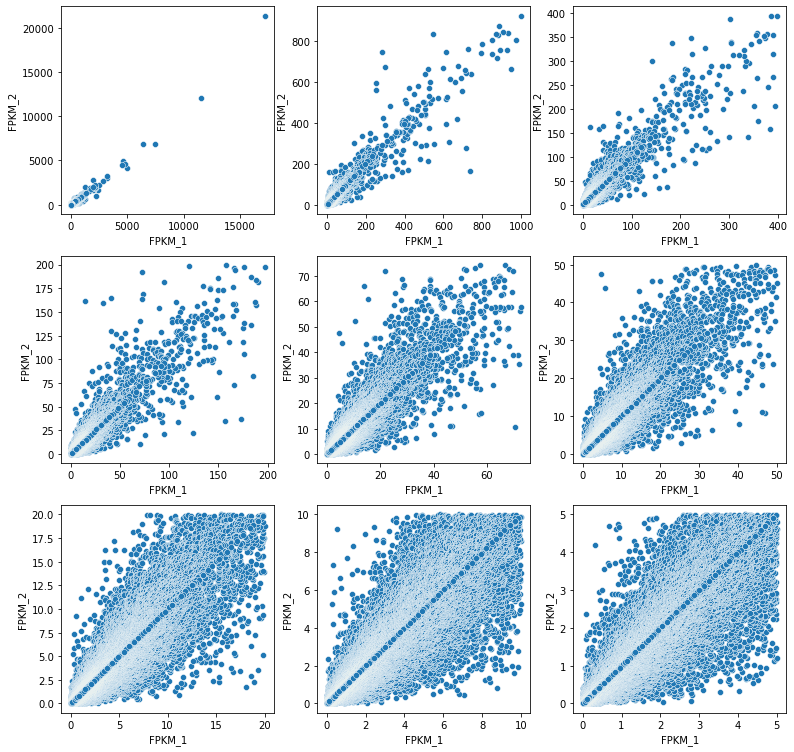

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(13, 13))
res_1 = sns.scatterplot(ax=ax[0][0], x='FPKM_1', y='FPKM_2', 
                        data=transcript_expn)

res_2 = sns.scatterplot(ax=ax[0][1], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 1000) & (transcript_expn["FPKM_2"] < 1000)])

res_3 = sns.scatterplot(ax=ax[0][2], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 400) & (transcript_expn["FPKM_2"] < 400) ])

res_4 = sns.scatterplot(ax=ax[1][0], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 200) & (transcript_expn["FPKM_2"] < 200)])

res_5 = sns.scatterplot(ax=ax[1][1], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 75) & (transcript_expn["FPKM_2"] < 75)])

res_6 = sns.scatterplot(ax=ax[1][2], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 50) & (transcript_expn["FPKM_2"] < 50)])

res_7 = sns.scatterplot(ax=ax[2][0], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 20) & (transcript_expn["FPKM_2"] < 20)])

res_8 = sns.scatterplot(ax=ax[2][1], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 10) & (transcript_expn["FPKM_2"] < 10)])

res_9 = sns.scatterplot(ax=ax[2][2], x='FPKM_1', y='FPKM_2',
                        data=transcript_expn[(transcript_expn["FPKM_1"] < 5) & (transcript_expn["FPKM_2"] < 5)])
fig.show()

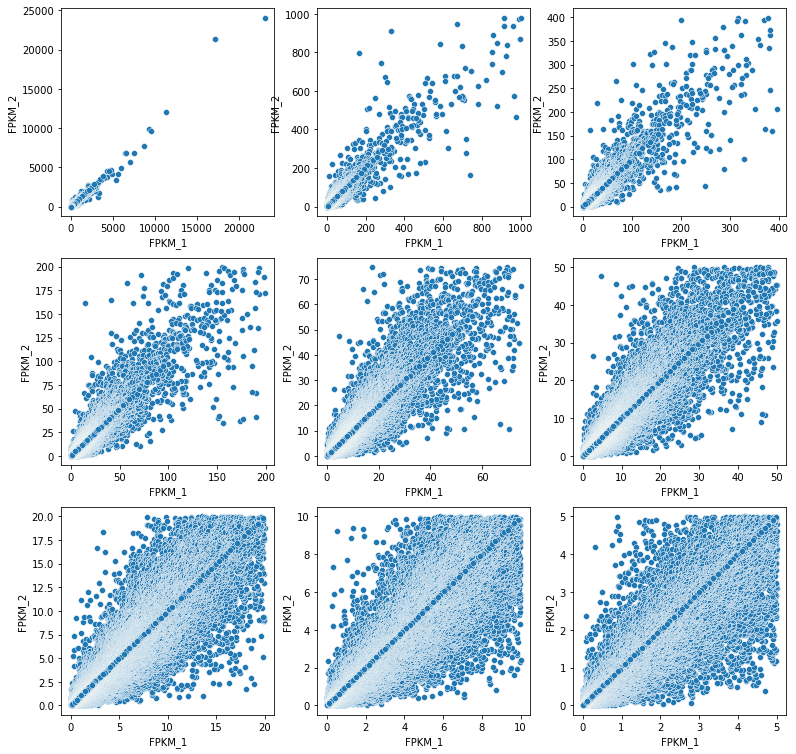

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(13, 13))
res_1 = sns.scatterplot(ax=ax[0][0], x='FPKM_1', y='FPKM_2', 
                        data=gene_expn)

res_2 = sns.scatterplot(ax=ax[0][1], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 1000) & (gene_expn["FPKM_2"] < 1000)])

res_3 = sns.scatterplot(ax=ax[0][2], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 400) & (gene_expn["FPKM_2"] < 400) ])

res_4 = sns.scatterplot(ax=ax[1][0], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 200) & (gene_expn["FPKM_2"] < 200)])

res_5 = sns.scatterplot(ax=ax[1][1], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 75) & (gene_expn["FPKM_2"] < 75)])

res_6 = sns.scatterplot(ax=ax[1][2], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 50) & (gene_expn["FPKM_2"] < 50)])

res_7 = sns.scatterplot(ax=ax[2][0], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 20) & (gene_expn["FPKM_2"] < 20)])

res_8 = sns.scatterplot(ax=ax[2][1], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 10) & (gene_expn["FPKM_2"] < 10)])

res_9 = sns.scatterplot(ax=ax[2][2], x='FPKM_1', y='FPKM_2',
                        data=gene_expn[(gene_expn["FPKM_1"] < 5) & (gene_expn["FPKM_2"] < 5)])
fig.show()

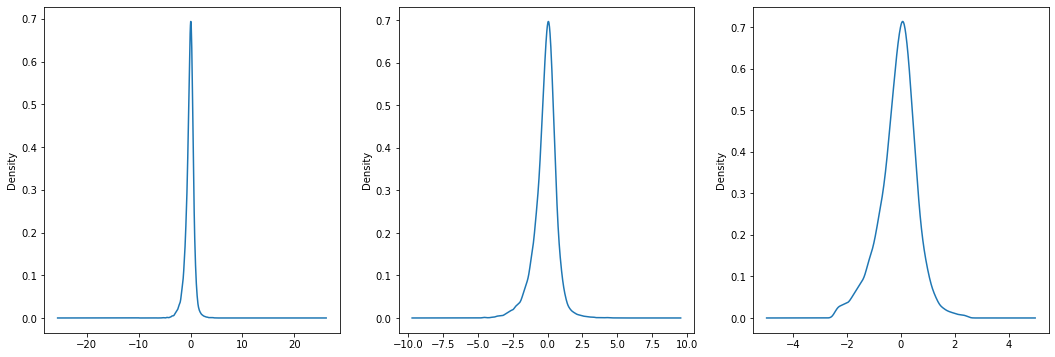

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = transcript_expn["log2(fold_change)"].plot(ax=ax[0], kind="density")
res_2 = transcript_expn[(transcript_expn["log2(fold_change)"] >= -5) & (transcript_expn["log2(fold_change)"] <= 5)]["log2(fold_change)"].plot(ax=ax[1], kind="density")
res_3 = transcript_expn[(transcript_expn["log2(fold_change)"] >= -2.5) & (transcript_expn["log2(fold_change)"] <= 2.5)]["log2(fold_change)"].plot(ax=ax[2], kind="density")
plt.show()

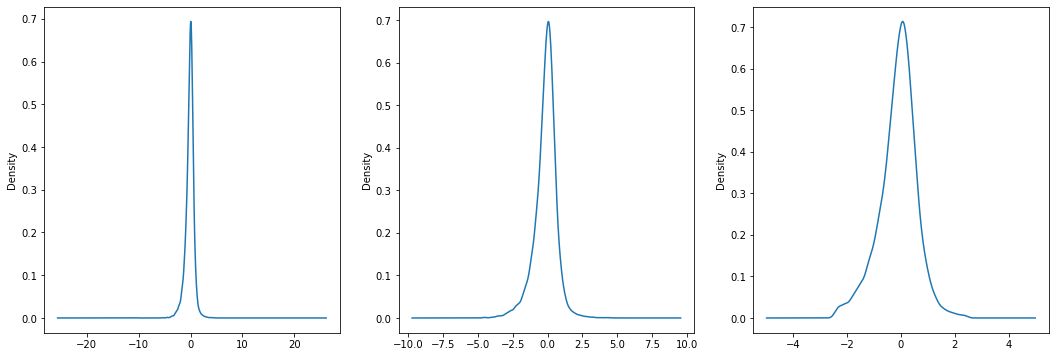

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = gene_expn["log2(fold_change)"].plot(ax=ax[0], kind="density")
res_2 = gene_expn[(gene_expn["log2(fold_change)"] >= -5) & (gene_expn["log2(fold_change)"] <= 5)]["log2(fold_change)"].plot(ax=ax[1], kind="density")
res_3 = gene_expn[(gene_expn["log2(fold_change)"] >= -2.5) & (gene_expn["log2(fold_change)"] <= 2.5)]["log2(fold_change)"].plot(ax=ax[2], kind="density")
plt.show()

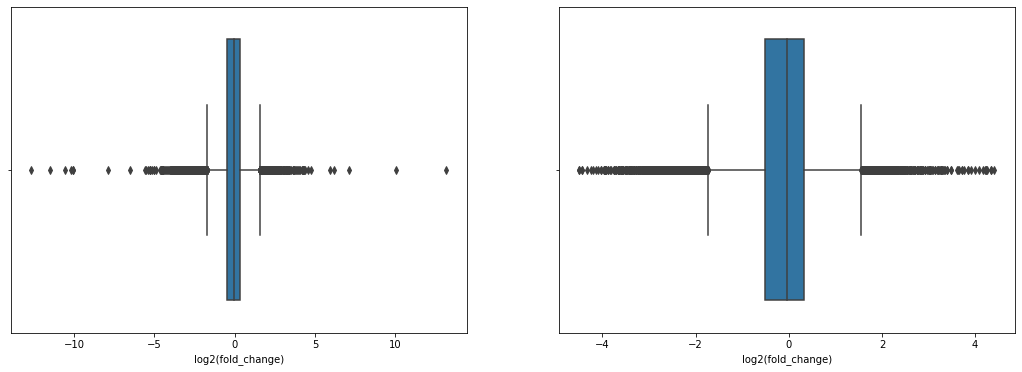

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
res_1 = sns.boxplot(x=transcript_expn["log2(fold_change)"], ax=ax[0])
res_2 = sns.boxplot(x=transcript_expn[(transcript_expn["log2(fold_change)"] >= -4.5) & (transcript_expn["log2(fold_change)"] <= 4.5)]["log2(fold_change)"], ax=ax[1])
plt.show()

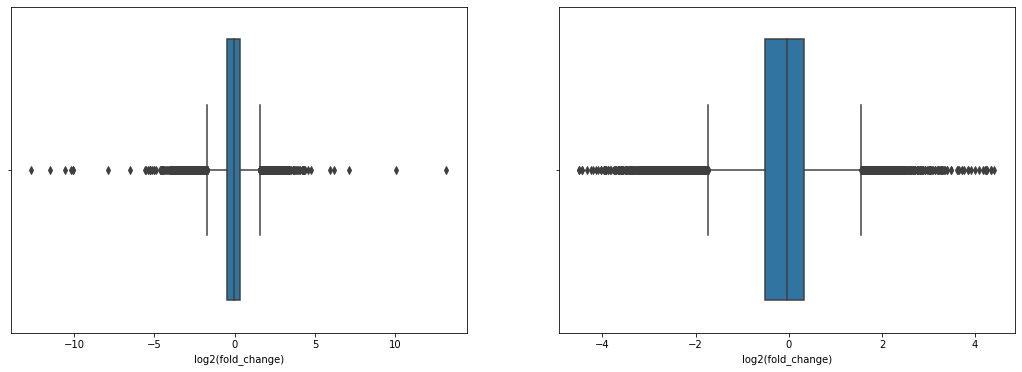

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
res_1 = sns.boxplot(x=gene_expn["log2(fold_change)"], ax=ax[0])
res_2 = sns.boxplot(x=gene_expn[(gene_expn["log2(fold_change)"] >= -4.5) & (gene_expn["log2(fold_change)"] <= 4.5)]["log2(fold_change)"], ax=ax[1])
plt.show()

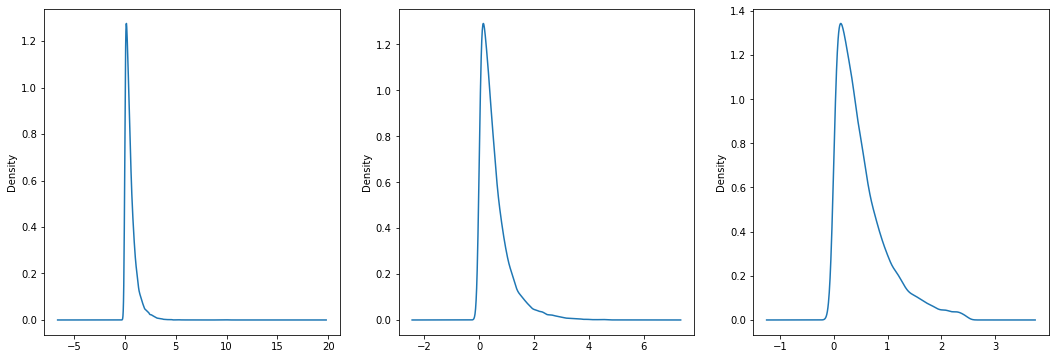

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = transcript_expn["fold_change_abs"].plot(ax=ax[0], kind="density")
res_2 = transcript_expn[transcript_expn["fold_change_abs"] <= 5]["fold_change_abs"].plot(ax=ax[1], kind="density")
res_3 = transcript_expn[transcript_expn["fold_change_abs"] <= 2.5]["fold_change_abs"].plot(ax=ax[2], kind="density")
plt.show()

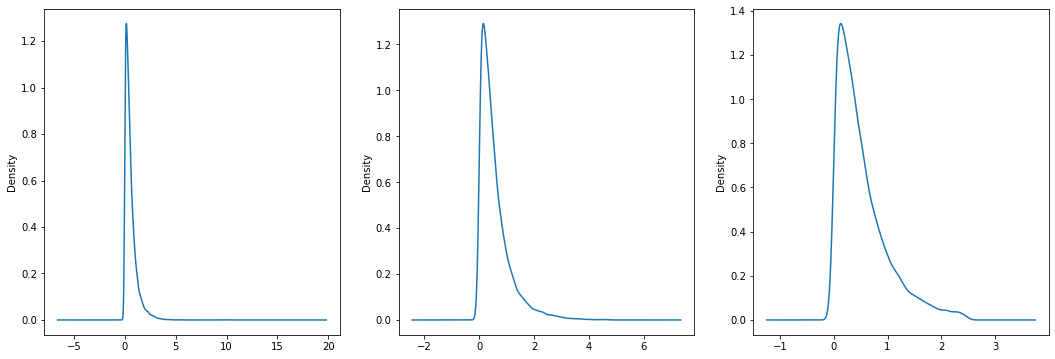

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = gene_expn["fold_change_abs"].plot(ax=ax[0], kind="density")
res_2 = gene_expn[gene_expn["fold_change_abs"] <= 5]["fold_change_abs"].plot(ax=ax[1], kind="density")
res_3 = gene_expn[gene_expn["fold_change_abs"] <= 2.5]["fold_change_abs"].plot(ax=ax[2], kind="density")
plt.show()

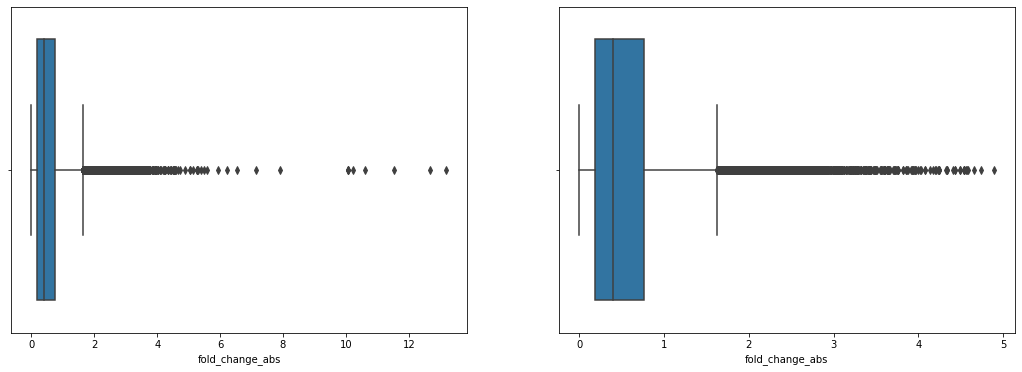

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
res_1 = sns.boxplot(x=transcript_expn["fold_change_abs"], ax=ax[0])
res_2 = sns.boxplot(x=transcript_expn[transcript_expn["fold_change_abs"] <= 5]["fold_change_abs"], ax=ax[1])
plt.show()

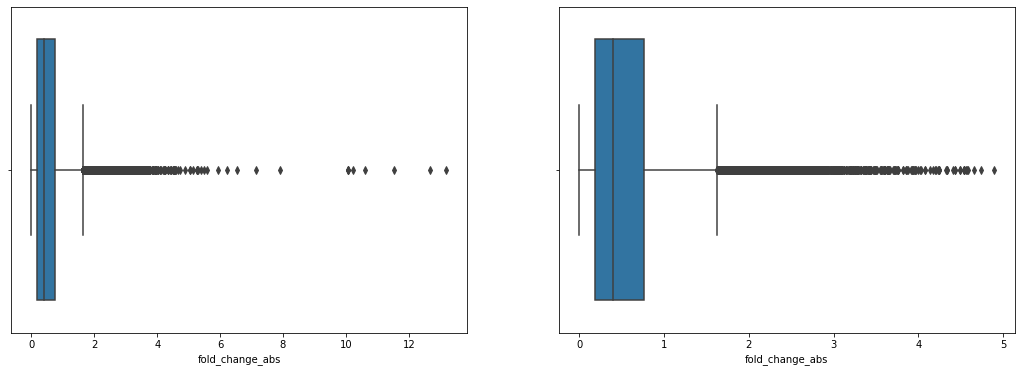

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
res_1 = sns.boxplot(x=gene_expn["fold_change_abs"], ax=ax[0])
res_2 = sns.boxplot(x=gene_expn[gene_expn["fold_change_abs"] <= 5]["fold_change_abs"], ax=ax[1])
plt.show()

Now let's analyse genes that were not expressed at all in one or more cases.

In [26]:
print("UNEXPRESSED GENES:", transcript_expn_nans.shape[0])
print("GENES EXPRESSED ONLY ONCE:", transcript_expn_infs.shape[0])
print("GENES EXPRESSED ONLY DURING CK TREATMENT:", transcript_expn_infs[transcript_expn_infs["log2(fold_change)"] == -np.inf].shape[0])
print("GENES EXPRESSED ONLY DURING COLD TREATMENT:", transcript_expn_infs[transcript_expn_infs["log2(fold_change)"] == np.inf].shape[0])

UNEXPRESSED GENES: 6794
GENES EXPRESSED ONLY ONCE: 1394
GENES EXPRESSED ONLY DURING CK TREATMENT: 739
GENES EXPRESSED ONLY DURING COLD TREATMENT: 655


In [27]:
print("UNEXPRESSED GENES:", gene_expn_nans.shape[0])
print("GENES EXPRESSED ONLY ONCE:", gene_expn_infs.shape[0])
print("GENES EXPRESSED ONLY DURING CK TREATMENT:", gene_expn_infs[gene_expn_infs["log2(fold_change)"] == -np.inf].shape[0])
print("GENES EXPRESSED ONLY DURING COLD TREATMENT:", gene_expn_infs[gene_expn_infs["log2(fold_change)"] == np.inf].shape[0])

UNEXPRESSED GENES: 6795
GENES EXPRESSED ONLY ONCE: 1394
GENES EXPRESSED ONLY DURING CK TREATMENT: 739
GENES EXPRESSED ONLY DURING COLD TREATMENT: 655


Let's see which genes changed expression the most

In [28]:
transcript_expn_infs["expression_change"] = transcript_expn_infs["FPKM_2"] - transcript_expn_infs["FPKM_1"]
transcript_expn_infs["expression_change_abs"] = abs(transcript_expn_infs["FPKM_2"] - transcript_expn_infs["FPKM_1"])
transcript_expn_infs = transcript_expn_infs.sort_values(by=["expression_change_abs"], ascending=False)
transcript_expn_infs

,gene_id,FPKM_1,FPKM_2,log2(fold_change),expression_change,expression_change_abs
21223,MSTRG.21380,64.064480,0.000000,-inf,-64.064480,64.064480
9537,MSTRG.10863,19.883300,0.000000,-inf,-19.883300,19.883300
4891,ENSDARG00000101058,13.396820,0.000000,-inf,-13.396820,13.396820
31345,MSTRG.5831,6.145120,0.000000,-inf,-6.145120,6.145120
1784,ENSDARG00000083336,4.229800,0.000000,-inf,-4.229800,4.229800
...,...,...,...,...,...,...
17674,MSTRG.18187,0.000000,0.000487,inf,0.000487,0.000487
5828,ENSDARG00000105387,0.000465,0.000000,-inf,-0.000465,0.000465
24205,MSTRG.24064,0.000000,0.000334,inf,0.000334,0.000334
5564,ENSDARG00000104208,0.000000,0.000130,inf,0.000130,0.000130


In [29]:
gene_expn_infs["expression_change"] = gene_expn_infs["FPKM_2"] - gene_expn_infs["FPKM_1"]
gene_expn_infs["expression_change_abs"] = abs(gene_expn_infs["FPKM_2"] - gene_expn_infs["FPKM_1"])
gene_expn_infs = gene_expn_infs.sort_values(by=["expression_change_abs"], ascending=False)
gene_expn_infs

,gene_id,FPKM_1,FPKM_2,log2(fold_change),expression_change,expression_change_abs
21223,MSTRG.21380,64.064480,0.000000,-inf,-64.064480,64.064480
9537,MSTRG.10863,19.883300,0.000000,-inf,-19.883300,19.883300
4891,ENSDARG00000101058,13.396820,0.000000,-inf,-13.396820,13.396820
31345,MSTRG.5831,6.145120,0.000000,-inf,-6.145120,6.145120
1784,ENSDARG00000083336,4.229800,0.000000,-inf,-4.229800,4.229800
...,...,...,...,...,...,...
17674,MSTRG.18187,0.000000,0.000487,inf,0.000487,0.000487
5828,ENSDARG00000105387,0.000465,0.000000,-inf,-0.000465,0.000465
24205,MSTRG.24064,0.000000,0.000334,inf,0.000334,0.000334
5564,ENSDARG00000104208,0.000000,0.000130,inf,0.000130,0.000130


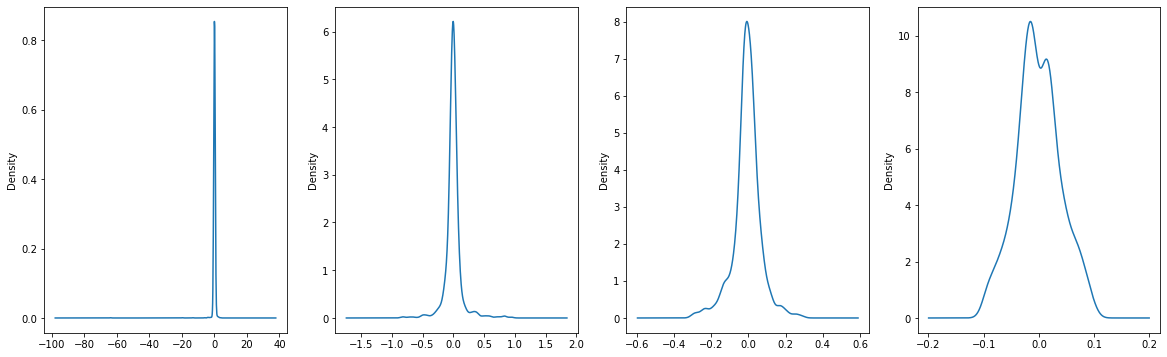

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
res_1 = transcript_expn_infs["expression_change"].plot(ax=ax[0], kind="density")
res_2 = transcript_expn_infs[(transcript_expn_infs["expression_change"] >= -1) & (transcript_expn_infs["expression_change"] <= 1)]["expression_change"].plot(ax=ax[1], kind="density")
res_3 = transcript_expn_infs[(transcript_expn_infs["expression_change"] >= -0.3) & (transcript_expn_infs["expression_change"] <= 0.3)]["expression_change"].plot(ax=ax[2], kind="density")
res_4 = transcript_expn_infs[(transcript_expn_infs["expression_change"] >= -0.1) & (transcript_expn_infs["expression_change"] <= 0.1)]["expression_change"].plot(ax=ax[3], kind="density")
plt.show()

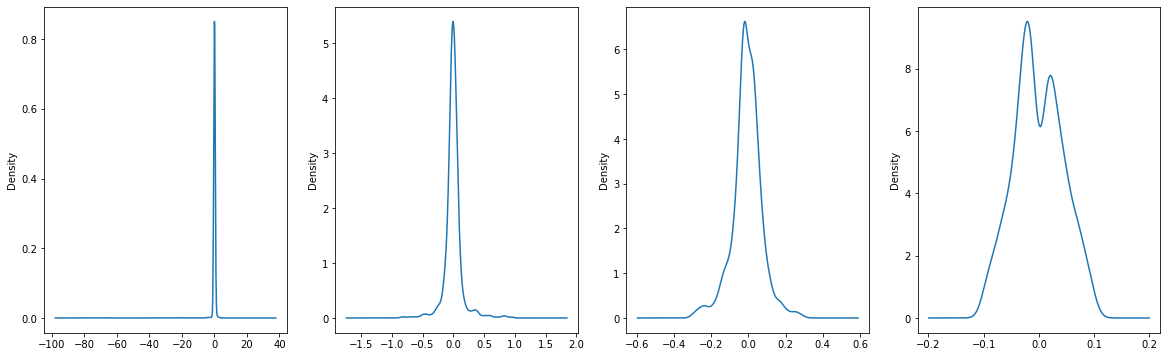

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
res_1 = gene_expn_infs["expression_change"].plot(ax=ax[0], kind="density")
res_2 = gene_expn_infs[(gene_expn_infs["expression_change"] >= -1) & (gene_expn_infs["expression_change"] <= 1)]["expression_change"].plot(ax=ax[1], kind="density")
res_3 = gene_expn_infs[(gene_expn_infs["expression_change"] >= -0.3) & (gene_expn_infs["expression_change"] <= 0.3)]["expression_change"].plot(ax=ax[2], kind="density")
res_4 = gene_expn_infs[(gene_expn_infs["expression_change"] >= -0.1) & (gene_expn_infs["expression_change"] <= 0.1)]["expression_change"].plot(ax=ax[3], kind="density")
plt.show()

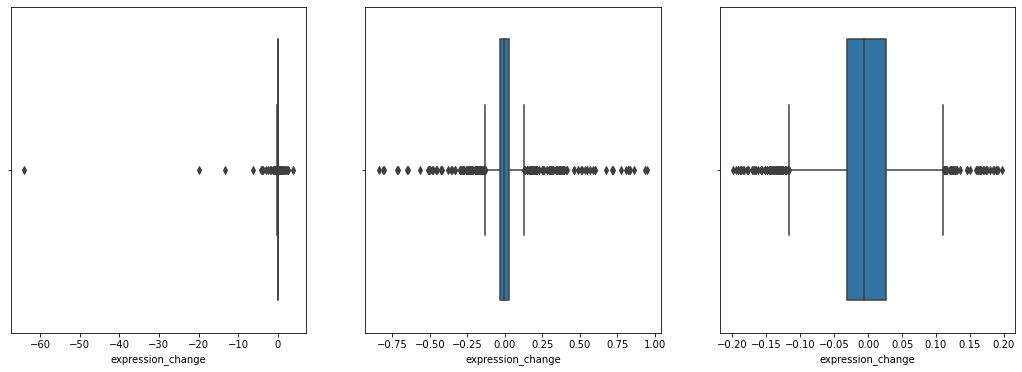

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = sns.boxplot(x=transcript_expn_infs["expression_change"], ax=ax[0])
res_2 = sns.boxplot(x=transcript_expn_infs[(transcript_expn_infs["expression_change"] >= -1) & (transcript_expn_infs["expression_change"] <= 1)]["expression_change"], ax=ax[1])
res_3 = sns.boxplot(x=transcript_expn_infs[(transcript_expn_infs["expression_change"] >= -0.2) & (transcript_expn_infs["expression_change"] <= 0.2)]["expression_change"], ax=ax[2])
plt.show()

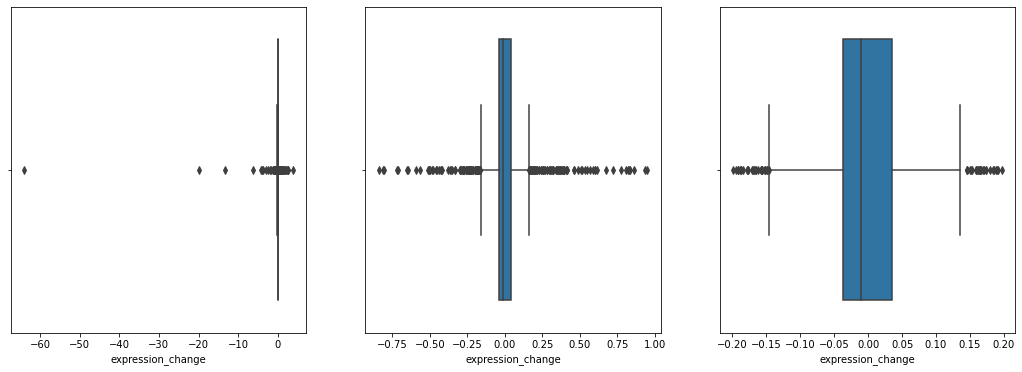

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = sns.boxplot(x=gene_expn_infs["expression_change"], ax=ax[0])
res_2 = sns.boxplot(x=gene_expn_infs[(gene_expn_infs["expression_change"] >= -1) & (gene_expn_infs["expression_change"] <= 1)]["expression_change"], ax=ax[1])
res_3 = sns.boxplot(x=gene_expn_infs[(gene_expn_infs["expression_change"] >= -0.2) & (gene_expn_infs["expression_change"] <= 0.2)]["expression_change"], ax=ax[2])
plt.show()

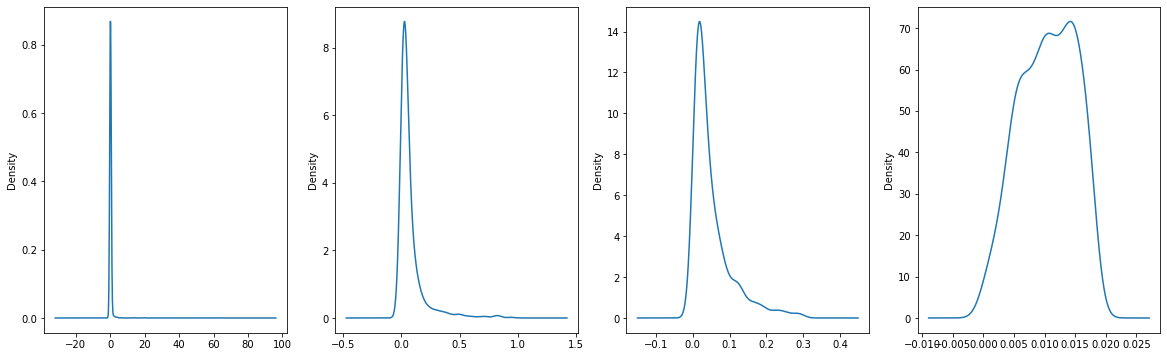

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
res_1 = transcript_expn_infs["expression_change_abs"].plot(ax=ax[0], kind="density")
res_2 = transcript_expn_infs[transcript_expn_infs["expression_change_abs"] <= 1]["expression_change_abs"].plot(ax=ax[1], kind="density")
res_3 = transcript_expn_infs[transcript_expn_infs["expression_change_abs"] <= 0.3]["expression_change_abs"].plot(ax=ax[2], kind="density")
res_4 = transcript_expn_infs[transcript_expn_infs["expression_change_abs"] <= 0.0182]["expression_change_abs"].plot(ax=ax[3], kind="density")
plt.show()

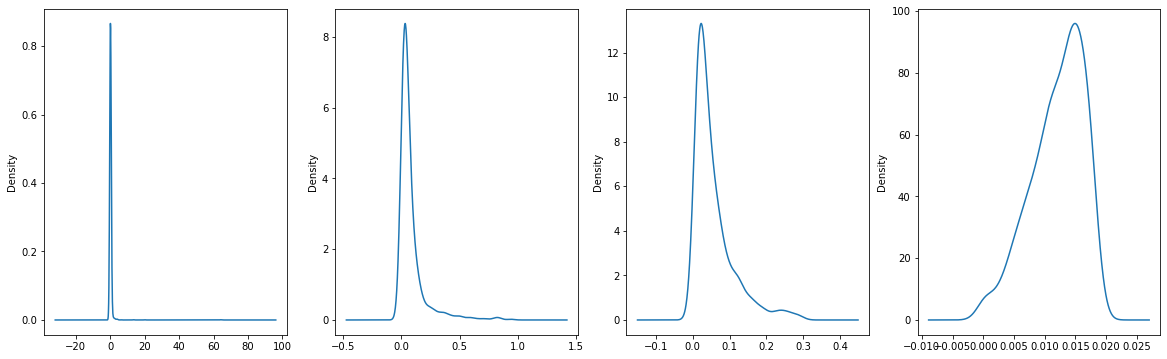

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
res_1 = gene_expn_infs["expression_change_abs"].plot(ax=ax[0], kind="density")
res_2 = gene_expn_infs[gene_expn_infs["expression_change_abs"] <= 1]["expression_change_abs"].plot(ax=ax[1], kind="density")
res_3 = gene_expn_infs[gene_expn_infs["expression_change_abs"] <= 0.3]["expression_change_abs"].plot(ax=ax[2], kind="density")
res_4 = gene_expn_infs[gene_expn_infs["expression_change_abs"] <= 0.0182]["expression_change_abs"].plot(ax=ax[3], kind="density")
plt.show()

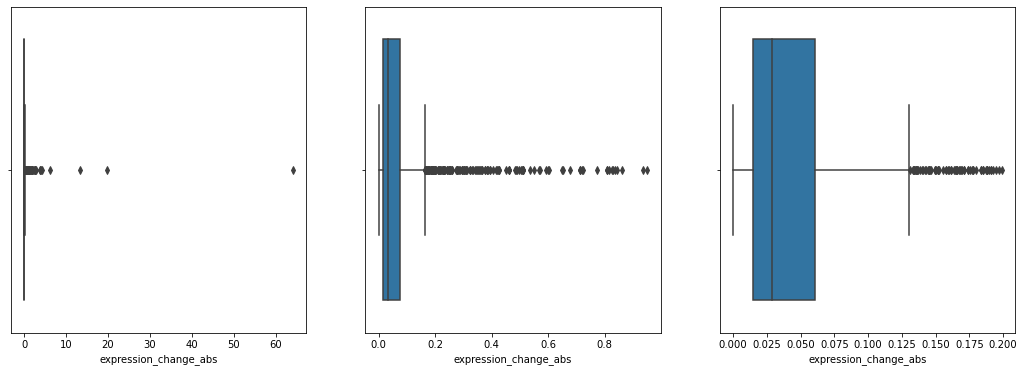

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = sns.boxplot(x=transcript_expn_infs["expression_change_abs"], ax=ax[0])
res_2 = sns.boxplot(x=transcript_expn_infs[transcript_expn_infs["expression_change_abs"] <= 1]["expression_change_abs"], ax=ax[1])
res_3 = sns.boxplot(x=transcript_expn_infs[transcript_expn_infs["expression_change_abs"] <= 0.2]["expression_change_abs"], ax=ax[2])
plt.show()

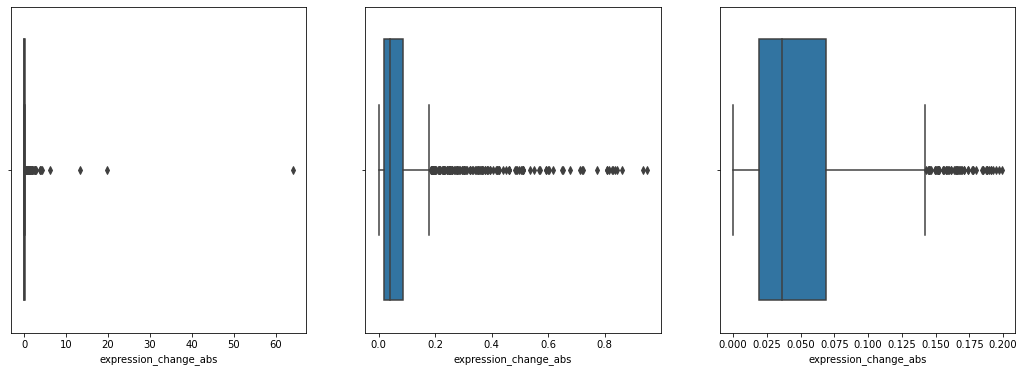

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
res_1 = sns.boxplot(x=gene_expn_infs["expression_change_abs"], ax=ax[0])
res_2 = sns.boxplot(x=gene_expn_infs[gene_expn_infs["expression_change_abs"] <= 1]["expression_change_abs"], ax=ax[1])
res_3 = sns.boxplot(x=gene_expn_infs[gene_expn_infs["expression_change_abs"] <= 0.2]["expression_change_abs"], ax=ax[2])
plt.show()

now let's do some paper-like analysis to compare our results to paper's results.

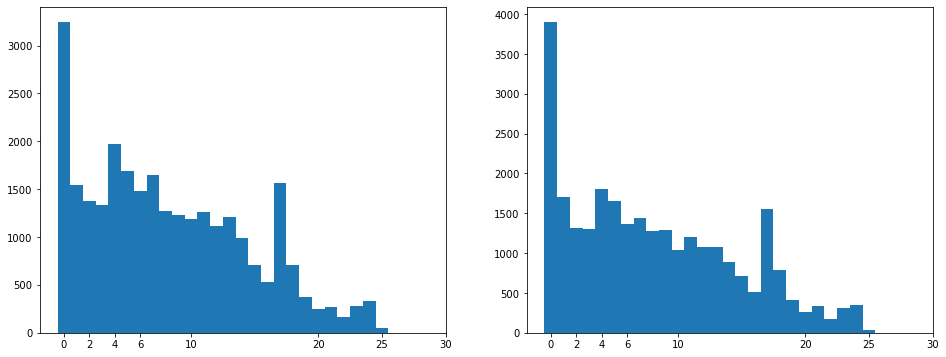

In [38]:
bins = [0, 0.25, 0.5, 0.75, 1, 1.4, 1.8, 2.2, 2.7, 3.2, 3.8, 4.4, 5.2, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 100, 1000, 10000, 20000, 30000]
hist_1, bin_edges_1 = np.histogram(transcript_expn["FPKM_1"], bins)
hist_2, bin_edges_2 = np.histogram(transcript_expn["FPKM_2"], bins)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].bar(range(len(hist_1)), hist_1, width=1) 
ax[1].bar(range(len(hist_2)), hist_2, width=1) 
xticks = [0, 2, 4, 6, 10, 20, 25, 30]
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
fig.show()

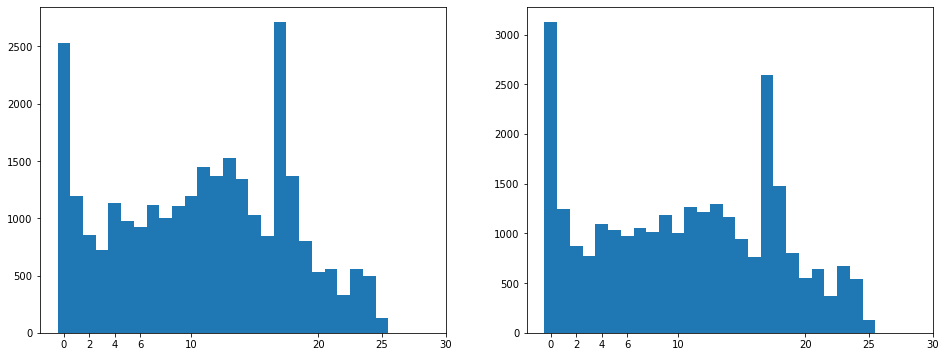

In [39]:
bins = [0, 0.25, 0.5, 0.75, 1, 1.4, 1.8, 2.2, 2.7, 3.2, 3.8, 4.4, 5.2, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 100, 1000, 10000, 20000, 30000]
hist_1, bin_edges_1 = np.histogram(gene_expn["FPKM_1"], bins)
hist_2, bin_edges_2 = np.histogram(gene_expn["FPKM_2"], bins)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].bar(range(len(hist_1)), hist_1, width=1) 
ax[1].bar(range(len(hist_2)), hist_2, width=1) 
xticks = [0, 2, 4, 6, 10, 20, 25, 30]
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
fig.show()

In [40]:
transcript_expn = pd.concat([transcript_expn, transcript_expn_infs])
gene_expn = pd.concat([gene_expn, gene_expn_infs])

In [41]:
# count fpkm in ck experiment

# Count unique genes with FPKM <= 1
totalcount = len(transcript_expn['gene_id'])
print("TOTAL COUNT:", totalcount)

lowfpkm = len(transcript_expn[transcript_expn['FPKM_1'] <=  1])
print("FPKM <= 1")
print("FPKM:", lowfpkm)
print("PERCENTAGE:", lowfpkm / totalcount)

# Count unique genes with 1 < FPKM < 20

midfpkm = len(transcript_expn[(transcript_expn['FPKM_1'] > 1) & (transcript_expn['FPKM_1'] <=  20)])
print("1 < FPKM <= 20")
print("FPKM:", midfpkm)
print("PERCENTAGE:", midfpkm / totalcount)

# Count unique genes with FPKM > 20

highfpkm = len(transcript_expn[(transcript_expn['FPKM_1'] > 20)])

print("FPKM > 20")
print("FPKM:", highfpkm)
print("PERCENTAGE:", highfpkm / totalcount)

TOTAL COUNT: 29181
FPKM <= 1
FPKM: 8892
PERCENTAGE: 0.3047188238922587
1 < FPKM <= 20
FPKM: 18575
PERCENTAGE: 0.6365443267879785
FPKM > 20
FPKM: 1714
PERCENTAGE: 0.05873684931976286


In [42]:
# count fpkm in cold experiment

# Count unique genes with FPKM <= 1
totalcount = len(transcript_expn['gene_id'])
print("TOTAL COUNT:", totalcount)

lowfpkm = len(transcript_expn[transcript_expn['FPKM_2'] <=  1])
print("FPKM <= 1")
print("FPKM:", lowfpkm)
print("PERCENTAGE:", lowfpkm / totalcount)

# Count unique genes with 1 < FPKM < 20

midfpkm = len(transcript_expn[(transcript_expn['FPKM_2'] > 1) & (transcript_expn['FPKM_2'] <=  20)])
print("1 < FPKM <= 20")
print("FPKM:", midfpkm)
print("PERCENTAGE:", midfpkm / totalcount)

# Count unique genes with FPKM > 20

highfpkm = len(transcript_expn[(transcript_expn['FPKM_2'] > 20)])

print("FPKM > 20")
print("FPKM:", highfpkm)
print("PERCENTAGE:", highfpkm / totalcount)

TOTAL COUNT: 29181
FPKM <= 1
FPKM: 9608
PERCENTAGE: 0.3292553373770604
1 < FPKM <= 20
FPKM: 17683
PERCENTAGE: 0.6059764915527227
FPKM > 20
FPKM: 1890
PERCENTAGE: 0.06476817107021693


In [43]:
# count fpkm in ck experiment

# Count unique genes with FPKM <= 1
totalcount = len(gene_expn['gene_id'])
print("TOTAL COUNT:", totalcount)

lowfpkm = len(gene_expn[gene_expn['FPKM_1'] <=  1])
print("FPKM <= 1")
print("FPKM:", lowfpkm)
print("PERCENTAGE:", lowfpkm / totalcount)

# Count unique genes with 1 < FPKM < 20

midfpkm = len(gene_expn[(gene_expn['FPKM_1'] > 1) & (gene_expn['FPKM_1'] <=  20)])
print("1 < FPKM <= 20")
print("FPKM:", midfpkm)
print("PERCENTAGE:", midfpkm / totalcount)

# Count unique genes with FPKM > 20

highfpkm = len(gene_expn[(gene_expn['FPKM_1'] > 20)])

print("FPKM > 20")
print("FPKM:", highfpkm)
print("PERCENTAGE:", highfpkm / totalcount)

TOTAL COUNT: 29180
FPKM <= 1
FPKM: 6684
PERCENTAGE: 0.22906100068540097
1 < FPKM <= 20
FPKM: 19096
PERCENTAGE: 0.6544208361891707
FPKM > 20
FPKM: 3400
PERCENTAGE: 0.11651816312542837


In [44]:
# count fpkm in cold experiment

# Count unique genes with FPKM <= 1
totalcount = len(gene_expn['gene_id'])
print("TOTAL COUNT:", totalcount)

lowfpkm = len(gene_expn[gene_expn['FPKM_2'] <=  1])
print("FPKM <= 1")
print("FPKM:", lowfpkm)
print("PERCENTAGE:", lowfpkm / totalcount)

# Count unique genes with 1 < FPKM < 20

midfpkm = len(gene_expn[(gene_expn['FPKM_2'] > 1) & (gene_expn['FPKM_2'] <=  20)])
print("1 < FPKM <= 20")
print("FPKM:", midfpkm)
print("PERCENTAGE:", midfpkm / totalcount)

# Count unique genes with FPKM > 20

highfpkm = len(gene_expn[(gene_expn['FPKM_2'] > 20)])

print("FPKM > 20")
print("FPKM:", highfpkm)
print("PERCENTAGE:", highfpkm / totalcount)

TOTAL COUNT: 29180
FPKM <= 1
FPKM: 7399
PERCENTAGE: 0.253564084989719
1 < FPKM <= 20
FPKM: 18083
PERCENTAGE: 0.6197052775873886
FPKM > 20
FPKM: 3698
PERCENTAGE: 0.1267306374228924
